In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Xavier\Decision-Bot\data\NYPD_Arrest_Data_2023.csv')

# WebLink to Data : https://www.kaggle.com/datasets/justinpakzad/nypd-arrests-2023-dataset
# Weblink to Codes : https://www.n2nov.net/nypdcodes.html

In [3]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         170095 non-null  int64  
 1   ARREST_DATE        170095 non-null  object 
 2   PD_CD              170095 non-null  int64  
 3   PD_DESC            170095 non-null  object 
 4   KY_CD              170082 non-null  float64
 5   OFNS_DESC          170095 non-null  object 
 6   LAW_CODE           170095 non-null  object 
 7   LAW_CAT_CD         168838 non-null  object 
 8   ARREST_BORO        170095 non-null  object 
 9   ARREST_PRECINCT    170095 non-null  int64  
 10  JURISDICTION_CODE  170095 non-null  int64  
 11  AGE_GROUP          170095 non-null  object 
 12  PERP_SEX           170095 non-null  object 
 13  PERP_RACE          170095 non-null  object 
 14  X_COORD_CD         170095 non-null  int64  
 15  Y_COORD_CD         170095 non-null  int64  
 16  La

In [5]:
df.isna().sum() 
#Finds null values in data (0 = No Missing Data)

ARREST_KEY              0
ARREST_DATE             0
PD_CD                   0
PD_DESC                 0
KY_CD                  13
OFNS_DESC               0
LAW_CODE                0
LAW_CAT_CD           1257
ARREST_BORO             0
ARREST_PRECINCT         0
JURISDICTION_CODE       0
AGE_GROUP               0
PERP_SEX                0
PERP_RACE               0
X_COORD_CD              0
Y_COORD_CD              0
Latitude                0
Longitude               0
dtype: int64

#### Removing Irrelevant Data to our project
* Coordinate info
* LAW_CAT_CD

In [6]:
#Removing Unnecessary Data
new_df = df.dropna()
#This code creates a new data set, whilst removing null values

In [7]:
#Data Removed
new_df.isna().sum()
#Testing to ensure the null values are removed 

ARREST_KEY           0
ARREST_DATE          0
PD_CD                0
PD_DESC              0
KY_CD                0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
X_COORD_CD           0
Y_COORD_CD           0
Latitude             0
Longitude            0
dtype: int64

In [8]:
a = 0 # '0' Patrol 
b = 0 # '1' Transit
c = 0 # '2' Housing 
d = 0 # '3' Non-NYPD

# This is making lists for each Jurisdiction code 

for x in new_df["JURISDICTION_CODE"]: 
    if x == 0: # If x reads code 0
        a += 1 # A counts up 
    elif x == 1: # If x counts code 1 
        b += 1 # B counts up 
    elif x == 2: # If x reads code 2 
        c += 1 # C counts up
    else: 
        x == 3 # If x reads code 3 
        d += 1 # D counts up

print (f"Patrol jurisdiction arrests: {a} \n" # Prints each jurisdiction code arrests
       f"Tranist jurisdiction arrests: {b} \n"
       f"Housing jurisdiction arrests: {c} \n"
       f"Non-NYPD jurisdiction arrests: {d} \n") # 'f' required before "{'lists made'}" to ensure that it formats the int to print 

Patrol jurisdiction arrests: 150598 
Tranist jurisdiction arrests: 7966 
Housing jurisdiction arrests: 6262 
Non-NYPD jurisdiction arrests: 3999 



### We can determine that mosts arrests are made by Patrol jurisdiction

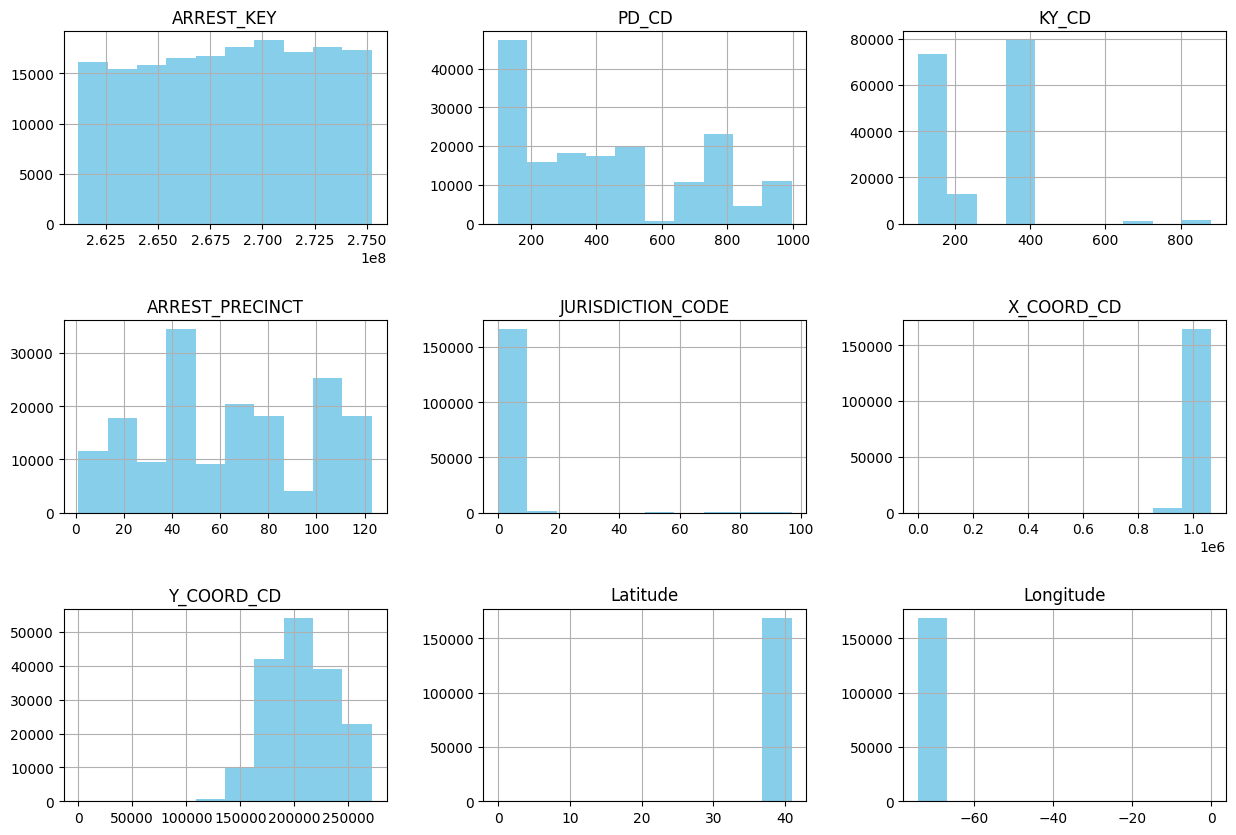

In [9]:
new_df.hist(figsize = (15,10), color = 'skyblue')
plt.subplots_adjust(hspace = 0.5) 
plt.show()

# After viewing that the data is only corresponding to types of int64/float64 we must now organize data for objects as they do not appear. 

In [10]:
## This is to identify the individual sexes that have commited crimes respectively (PERP_SEX)

Male = []

for x in new_df["PERP_SEX"]:
    if x =='M':
        Male.append(x)

Male_Num = len(Male)
print(f"This many Males have committed a crime: {Male_Num}")

Female = []

for x in new_df["PERP_SEX"]:
    if x =='F':
        Female.append(x)

Female_Num = len(Female)

print(f"This many Females have committed a crime: {Female_Num}")

This many Males have committed a crime: 136432
This many Females have committed a crime: 28903


In [11]:
## This is to drop 2 categories in LAW_CAT_CD section as they are irrelevant

new_df = new_df.drop(new_df[new_df['LAW_CAT_CD'] == '9'].index)
new_df = new_df.drop(new_df[new_df['LAW_CAT_CD'] == 'I'].index)

## After testing, this code has removed the aforementioned 2 columns

In [12]:
## This is to count the individual crimes in terms of status of Law 

# Creating a list for the predetermined categories 
Felony = []
Violation = []
Misdemeanor = []

#For loop to iterate through column given a specific condition 
for x in new_df["LAW_CAT_CD"]: 
    if x == 'F':            # The condition is if it read the specified characters then to categorize them to their specified categories 
        Felony.append(x)
    elif x == 'M':
        Misdemeanor.append(x)
    elif x == 'V':
        Violation.append(x)

Felony_Num = len(Felony)   # After creating the categories for each and adding them to their lists, this will count each list using a temp variable
Misdemeanor_Num = len(Misdemeanor)
Violation_Num = len(Violation)

print(f"This many Felonies have been committed: {Felony_Num}")
print(f"This many Violations have been committed: {Violation_Num}")
print(f"This many Misdemeanors have been committed: {Misdemeanor_Num}")

This many Felonies have been committed: 73853
This many Violations have been committed: 973
This many Misdemeanors have been committed: 93347


In [13]:
## We need to remove 17 different variables: 
## (3,4,7,11,14,15,17,51,69,71,72,73,74,79,85,87,88,97)

new_df = new_df.drop(new_df[new_df['JURISDICTION_CODE'] == '71'].index)

In [14]:
# Creating a list for the predetermined categories 
Patrol = []
Transit = []
Housing = []
Non_NYPD = []

#For loop to iterate through column given a specific condition 
for x in new_df["JURISDICTION_CODE"]: 
    if x == 0:
        Patrol.append(x)     # The condition is if it read the specified characters then to categorize them to their specified categories 
    elif x == 1:
        Transit.append(x)
    elif x == 2:
        Housing.append(x)
    elif x >= 3:
        Non_NYPD.append(x)        

Patrol_Num = len(Patrol)     # After creating the categories for each and adding them to their lists, this will count each list using a temp variable
Transit_Num = len(Transit)
Housing_Num = len(Housing)
Non_NYPD_Num = len(Non_NYPD)

print(f"This many Patrol arrests have been made: {Patrol_Num}")
print(f"This many Transit arrests have been made: {Transit_Num}")
print(f"This many Housing arrests have been made: {Housing_Num}")
print(f"This many Non NYPD have been committed: {Non_NYPD_Num}")

This many Patrol arrests have been made: 150167
This many Transit arrests have been made: 7954
This many Housing arrests have been made: 6258
This many Non NYPD have been committed: 3794


In [15]:
# Creating a list for the predetermined categories 
Bronx = []
Brooklyn = []
Manhattan = []
Queens = []
Staten_Island = []

#For loop to iterate through column given a specific conditionf
for x in new_df["ARREST_BORO"]:    
    if x == 'B':            # The condition is if it read the specified characters then to categorize them to their specified categories 
        Bronx.append(x)
    elif x == 'K':
        Brooklyn.append(x)
    elif x == 'M':
        Manhattan.append(x)
    elif x == 'Q':
        Queens.append(x)
    elif x == 'S':
        Staten_Island.append(x)   

Bronx_Num = len(Bronx)           # After creating the categories for each and adding them to their lists, this will count each list using a temp variable
Brooklyn_Num = len(Brooklyn)
Manhattan_Num = len(Manhattan)
Queens_Num = len(Queens)
Staten_Island_Num = len(Staten_Island)

print(f"This many crimes have been commited in The Bronx: {Bronx_Num}")
print(f"This many crimes have been commited in Brooklyn: {Brooklyn_Num}")
print(f"This many crimes have been commited in Manhattan: {Manhattan_Num}")
print(f"This many crimes have been commited in Queens: {Queens_Num}")
print(f"This many crimes have been commited in Staten Island: {Staten_Island_Num}")


This many crimes have been commited in The Bronx: 39646
This many crimes have been commited in Brooklyn: 46606
This many crimes have been commited in Manhattan: 38902
This many crimes have been commited in Queens: 35613
This many crimes have been commited in Staten Island: 7406


In [16]:
# Creating a list for the predetermined categories 
White = []
Black = []
White_Hispanic = []
Black_Hispanic = []
Asian_PI = []
Unknown = []

#For loop to iterate through column given a specific condition
for x in new_df["PERP_RACE"]:       
    if x == 'WHITE':            # The condition is if it read the specified characters then to categorize them to their specified categories
        White.append(x)
    elif x == 'BLACK':
        Black.append(x)
    elif x == 'WHITE HISPANIC':
        White_Hispanic.append(x)
    elif x == 'BLACK HISPANIC':
        Black_Hispanic.append(x)
    elif x == 'ASIAN / PACIFIC ISLANDER':
        Asian_PI.append(x)
    elif x == 'UNKNOWN':
        Unknown.append(x)

White_Num = len(White)       # After creating the categories for each and adding them to their lists, this will count each list using a temp variable
Black_Num = len(Black)
White_Hispanic_Num = len(White_Hispanic)
Black_Hispanic_Num = len(Black_Hispanic)
Asian_PI_Num = len(Asian_PI)
Unknown_Num = len(Unknown)

print(f"Whites have commited this many crimes: {White_Num}")
print(f"Blacks have commited this many crimes: {Black_Num}")
print(f"White Hispanics have commited this many crimes: {White_Hispanic_Num}")
print(f"Black Hispanics have commited this many crimes: {Black_Hispanic_Num}")
print(f"Asian / Pacific Islanders have commited this many crimes: {Asian_PI_Num}")
print(f"This many perps have an unidentified race and have commited this many crimes: {Unknown_Num}")


Whites have commited this many crimes: 16142
Blacks have commited this many crimes: 81340
White Hispanics have commited this many crimes: 42559
Black Hispanics have commited this many crimes: 16253
Asian / Pacific Islanders have commited this many crimes: 8907
This many perps have an unidentified race and have commited this many crimes: 2424


In [17]:
# Creating a list for the predetermined categories 
Young_Adult = [] #18-24
Adult = [] #25-44
MiddleAge = [] #45-64
SeniorAge = [] #65+ 

#For loop to iterate through column given a specific condition
for x in new_df["AGE_GROUP"]: 
    if x == '18-24':            # The condition is if it read the specified characters then to categorize them to their specified categories
        Young_Adult.append(x)
    elif x == '25-44':
        Adult.append(x)
    elif x == '45-64': 
        MiddleAge.append(x)
    elif x == '65+': 
        SeniorAge.append(x)

Young_Adult_Num = len(Young_Adult)      # After creating the categories for each and adding them to their lists, this will count each list using a temp variable
Adult_Num = len(Adult)
MiddleAge_Num = len(MiddleAge)
SeniorAge_Num = len(SeniorAge)

print(f"This many Young Adults from 18-24 have commited a crime: {Young_Adult_Num}")
print(f"This many Adults from 25-44 have commited a crime: {Adult_Num}")
print(f"This many Middle Aged Adults from 45-64 have commited a crime: {MiddleAge_Num}")
print(f"This many Seniors 65+ have commited a crime: {SeniorAge_Num}")

This many Young Adults from 18-24 have commited a crime: 29720
This many Adults from 25-44 have commited a crime: 96428
This many Middle Aged Adults from 45-64 have commited a crime: 33018
This many Seniors 65+ have commited a crime: 2765


## Objects to be converted
### Easiest (Top)
* Sex; m = 0, f = 1 [DONE] 
* Law Cat CD; Violation = 0, Misdemeanor = 1, Felony = 2; [DONE]
* Jurisdiction code; Patrol = 0, Transit = 1, Housing = 2, Non-NYPD = 3[DONE]
* Arrest Borough; Bk, Bx, Q, M, S = [0-4]; [DONE]
* Perp Race (White = 0, Black = 1, White Hispanic = 2, Black Hispanic = 3, Asian/ PI = 4) [DONE]
* Age Group (<18 = 0, 18-24 = 1, 25-44 = 2, 45-64 = 3, 65+ = 4) [DONE]
* Arrest Date; if 1, Jan. (Date range to determine which week. Ex: if x < 1 || x > 31;) [DONE]
* 
* PD_CD = PD_DESC(Run loop to find which codes equal desc) [Ex:PD_CD = 105 == PD_DESC = Strangulation 1st]
#### Hardest (Bottom)

In [18]:
# Importing tool to allow for time to be read
from datetime import datetime  

# This will extract the dates given through CSV and return them as objects to read in Month, Day, Year format.
def extract_month(date_str):
    date_object = datetime.strptime(date_str, "%m/%d/%Y")
    return date_object.month

# Applying the code to read through a specific column in our data
new_df['ARREST_MONTH'] = new_df['ARREST_DATE'].apply(lambda x: extract_month(x))

# Mapping each month to a specific number 
month_mapping = { 
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December',
}

# Applying the month mapping to the column
new_df['ARREST_MONTH'] = new_df['ARREST_MONTH'].map(month_mapping)

# Testing to see if the months read from the code given
new_df['ARREST_MONTH'].head(20)

0      January
1     February
2     February
3      January
4     February
5      January
6      January
7        March
8      January
9        March
10     January
11    February
12    February
13       April
14       March
15       April
16       April
17       March
18    February
19       March
Name: ARREST_MONTH, dtype: object

In [19]:
clean_df = new_df.drop(columns = ['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude'], axis = 0)
#new_df is being reassigned to NEW_DF with the updated data (Removing coordinates / Altitude)

In [20]:
clean_df.to_csv('Clean_NYPD_Arrest_Data', index = False)